# Importing Libraries and Reading Data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn. metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv("./Git Hub/ml-basics/data/diabetes.csv").iloc[:,1:]

In [3]:
d = data.iloc[:,:-1]
label = data['Diabetic']

In [4]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
output = 'Diabetic'

In [5]:
data.head()

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
0            0            171                      80                34   
1            8             92                      93                47   
2            7            115                      47                52   
3            9            103                      78                25   
4            1             85                      59                27   

   SerumInsulin        BMI  DiabetesPedigree  Age  Diabetic  
0            23  43.509726          1.213191   21         0  
1            36  21.240576          0.158365   23         0  
2            35  41.511523          0.079019   23         0  
3           304  29.582192          1.282870   43         1  
4            35  42.604536          0.549542   22         0

In [6]:
data.shape

(15000, 9)

In [7]:
data.describe()

Pregnancies  PlasmaGlucose  DiastolicBloodPressure  TricepsThickness  \
count  15000.000000   15000.000000            15000.000000      15000.000000   
mean       3.224533     107.856867               71.220667         28.814000   
std        3.391020      31.981975               16.758716         14.555716   
min        0.000000      44.000000               24.000000          7.000000   
25%        0.000000      84.000000               58.000000         15.000000   
50%        2.000000     104.000000               72.000000         31.000000   
75%        6.000000     129.000000               85.000000         41.000000   
max       14.000000     192.000000              117.000000         93.000000   

       SerumInsulin           BMI  DiabetesPedigree           Age  \
count  15000.000000  15000.000000      15000.000000  15000.000000   
mean     137.852133     31.509646          0.398968     30.137733   
std      133.068252      9.759000          0.377944     12.089703   
min       14.000000     18.200512          0.078044     21.000000   
25%       39.000000     21.259887          0.137743     22.000000   
50%       83.000000     31.767940          0.200297     24.000000   
75%      195.000000     39.259692          0.616285     35.000000   
max      799.000000     56.034628          2.301594     77.000000   

           Diabetic  
count  15000.000000  
mean       0.333333  
std        0.471420  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

# Handling Null Values

In [8]:
Missing_Col = ['PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI']

In [9]:
data.isnull().sum()

Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [10]:
for i in Missing_Col:
    d[i].replace(0,data[i].mean(),inplace = True)

<AxesSubplot:>

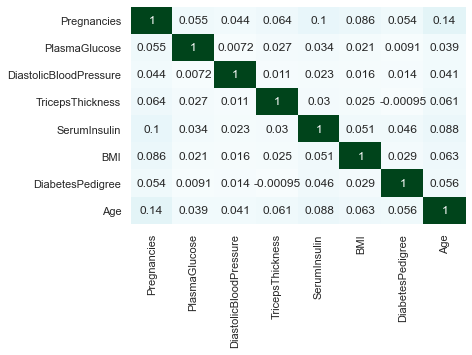

In [11]:
sns.heatmap(d.corr(), cbar = False,cmap = 'BuGn',annot=True)

# Ploting Graphs

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'PlasmaGlucose'}>,
        <AxesSubplot:title={'center':'DiastolicBloodPressure'}>],
       [<AxesSubplot:title={'center':'TricepsThickness'}>,
        <AxesSubplot:title={'center':'SerumInsulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigree'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Diabetic'}>]], dtype=object)

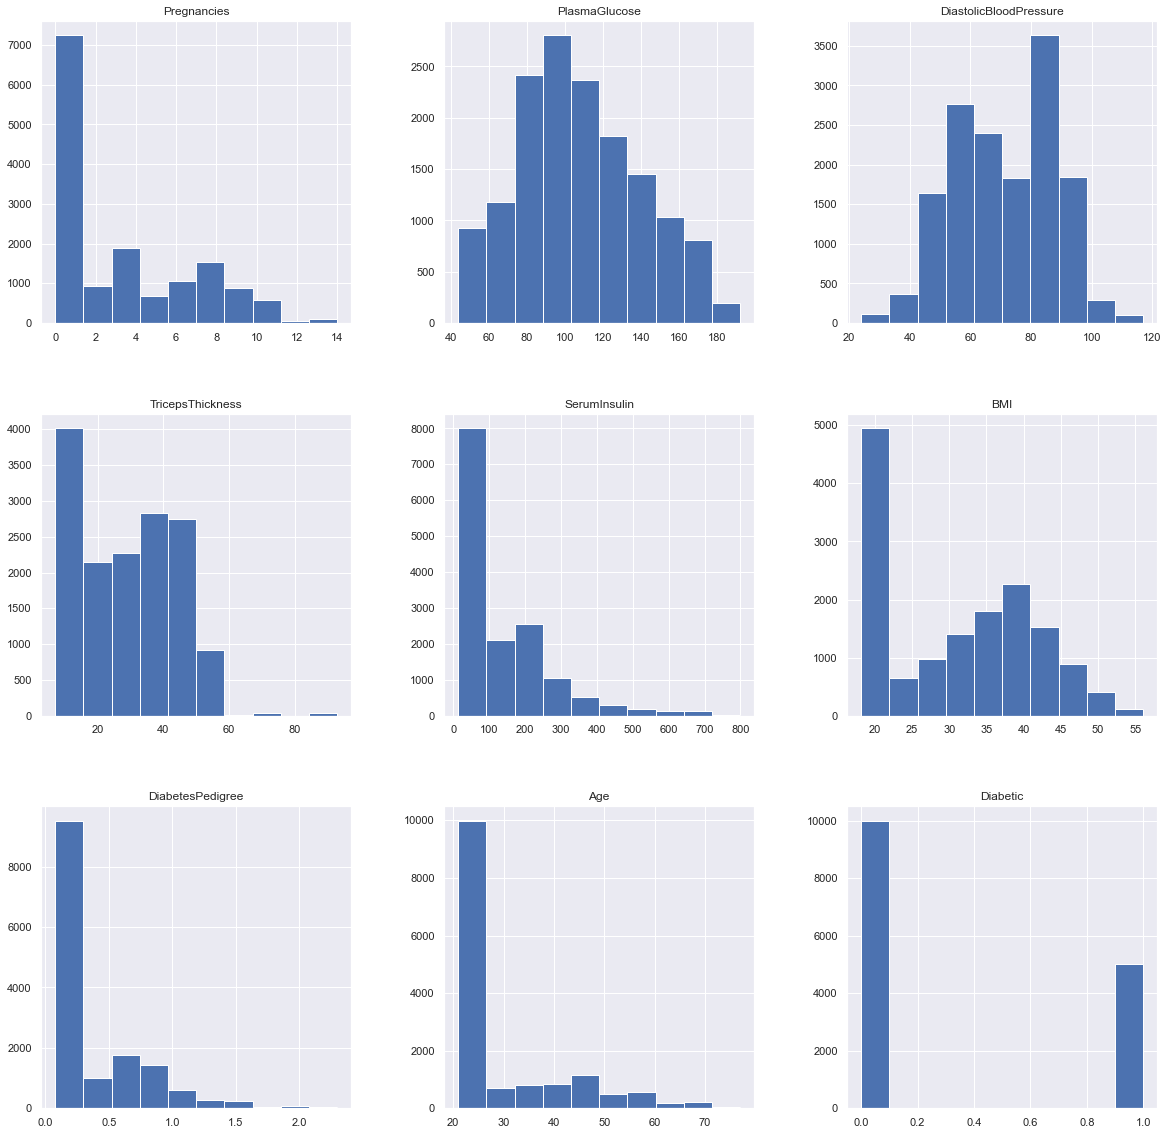

In [12]:
data.hist(figsize = (20,20))

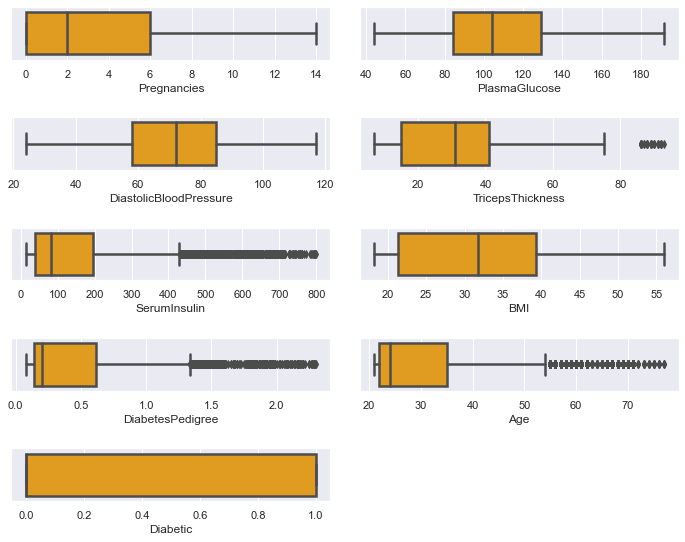

In [13]:
fig = plt.figure(figsize=(10,8))
for index,column in enumerate(list(data.columns)):
    plt.subplot(5,2,index+1)
    sns.boxplot(data.loc[:, column],color="Orange", linewidth=2.5)
fig.tight_layout(pad = 2)

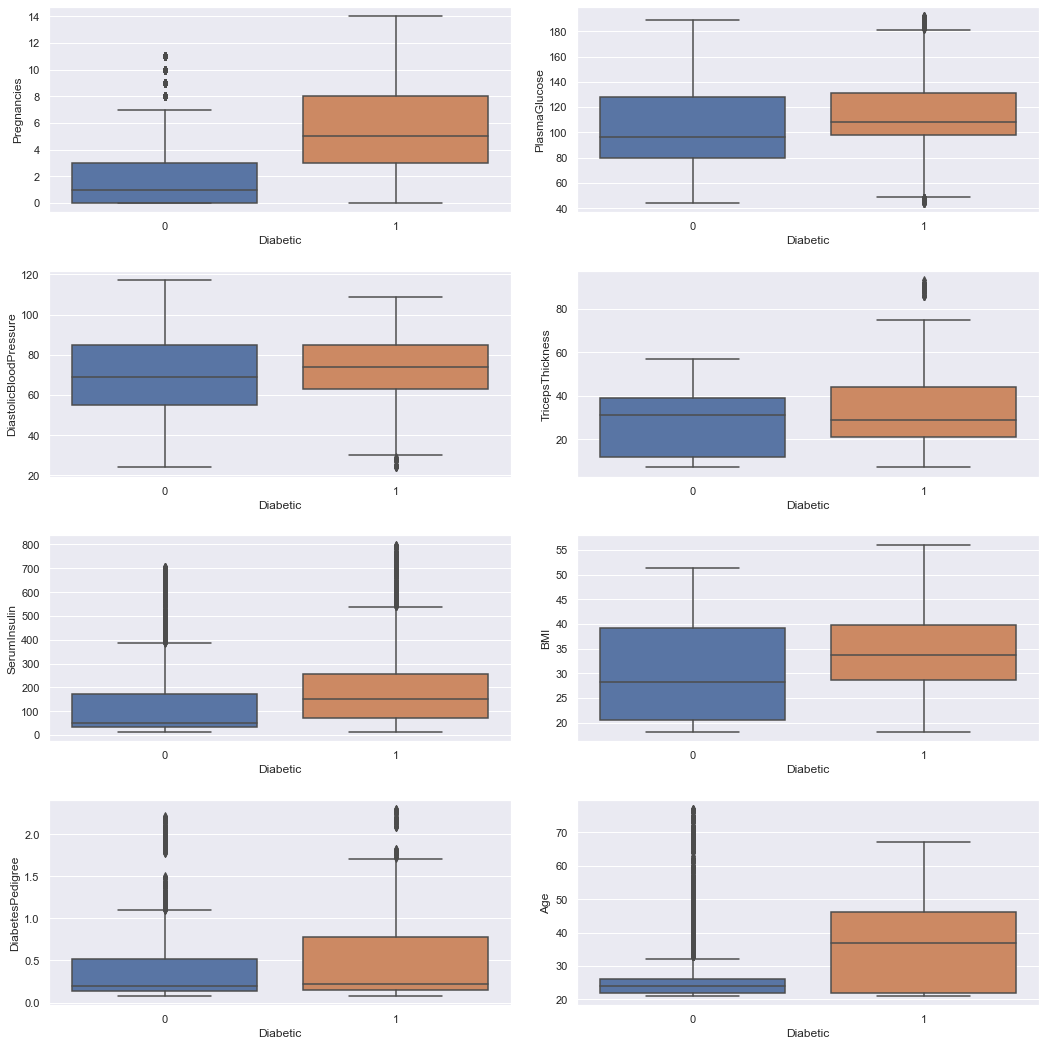

In [14]:
fig = plt.figure(figsize=(15,15))
for i,col in enumerate(list(d.columns)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = label, y = d[col])
fig.tight_layout(pad = 2)

In [15]:
#sns.pairplot(data, hue = 'Diabetic')

# Handling Outliers

# Z - Score

In [56]:

z = np.abs(stats.zscore(data))
threshold = np.where(z > 2.5)

In [17]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

Pregnancies                 6.000000
PlasmaGlucose              45.000000
DiastolicBloodPressure     27.000000
TricepsThickness           26.000000
SerumInsulin              156.000000
BMI                        17.999804
DiabetesPedigree            0.478542
Age                        13.000000
Diabetic                    1.000000
dtype: float64

In [18]:
outlier = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

In [19]:
outlier.sum()

Pregnancies                  0
PlasmaGlucose                0
DiastolicBloodPressure       0
TricepsThickness            31
SerumInsulin               666
BMI                          0
DiabetesPedigree           475
Age                       1019
Diabetic                     0
dtype: int64

In [57]:
dz =data[(z < 2.5).all(axis=1)]

In [58]:
print("no.of outliers removed:",data.shape[0] - dz.shape[0])

no.of outliers removed: 1674


In [22]:
dIQR = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [23]:
print("no.of outliers removed:",data.shape[0] - dIQR.shape[0])

no.of outliers removed: 2055


# Test and Train Split

## IQR Outlier data

In [24]:
X, y = dIQR[features].values, dIQR[output].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 9708
Test cases: 3237


# Logistic Regression

In [26]:
model = LogisticRegression().fit(X_train, y_train)

In [27]:
predictions = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.8001235712079086


In [65]:
predictions = model.predict(X_train)

print('Accuracy: ', accuracy_score(y_train, predictions))

Accuracy:  1.0


In [66]:
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7500
           1       1.00      1.00      1.00      3750

    accuracy                           1.00     11250
   macro avg       1.00      1.00      1.00     11250
weighted avg       1.00      1.00      1.00     11250



In [67]:
pd.DataFrame(y_train).value_counts()

0    7500
1    3750
dtype: int64

In [70]:
cm = confusion_matrix(y_train, predictions)
print (cm)

[[7500    0]
 [   0 3750]]


# ROC Curve

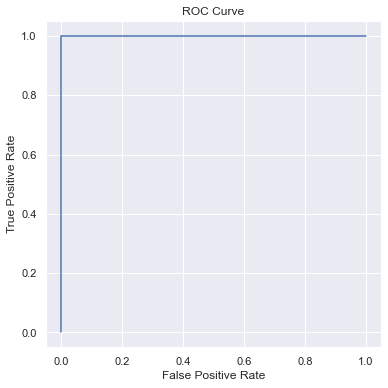

In [71]:
y_scores = model.predict_proba(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [31]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8516403024118423


# Random Forest

In [32]:
model = RandomForestClassifier().fit(X_train, (y_train))
predictions = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9400679641643497


In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2329
           1       0.91      0.87      0.89       908

    accuracy                           0.94      3237
   macro avg       0.93      0.92      0.92      3237
weighted avg       0.94      0.94      0.94      3237



In [34]:
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2250   79]
 [ 115  793]]


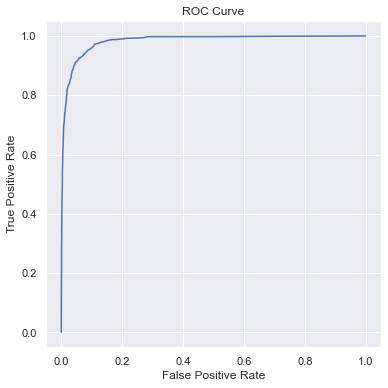

In [35]:
y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [36]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.9829385000085117


# Z-score outlier data

In [37]:
X, y = dz[features].values, dz[output].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10605
Test cases: 3536


In [38]:
model = RandomForestClassifier().fit(X_train, (y_train))
predictions = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9403280542986425


In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2411
           1       0.91      0.90      0.91      1125

    accuracy                           0.94      3536
   macro avg       0.93      0.93      0.93      3536
weighted avg       0.94      0.94      0.94      3536



In [40]:
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2312   99]
 [ 112 1013]]


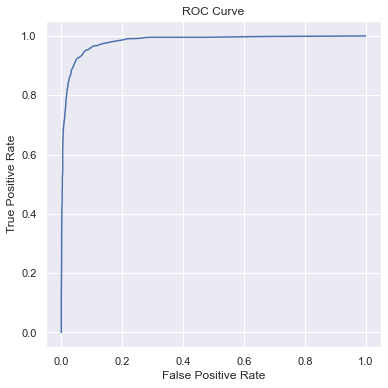

In [41]:
y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [42]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.9820262684916357


# Pure data

In [43]:
X, y = data[features].values, data[output].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 11250
Test cases: 3750


In [44]:
model = RandomForestClassifier().fit(X_train, (y_train))
predictions = model.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9301333333333334


In [45]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2500
           1       0.90      0.88      0.89      1250

    accuracy                           0.93      3750
   macro avg       0.92      0.92      0.92      3750
weighted avg       0.93      0.93      0.93      3750



In [46]:
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2384  116]
 [ 146 1104]]


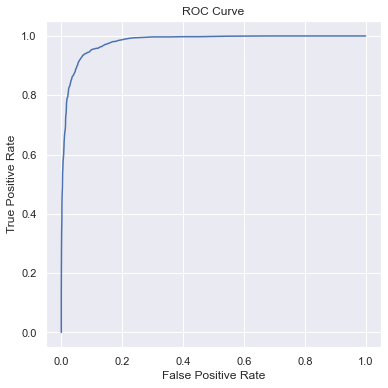

In [47]:
y_scores = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [48]:
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.9804780799999999
